💾 The data
You have access to a real dataset containing dinosaur records from the Paleobiology Database (source):
Column name	Description
occurence_no	The original occurrence number from the Paleobiology Database.
name	The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil).
diet	The main diet (omnivorous, carnivorous, herbivorous).
type	The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur).
length_m	The maximum length, from head to tail, in meters.
max_ma	The age in which the first fossil records of the dinosaur where found, in million years.
min_ma	The age in which the last fossil records of the dinosaur where found, in million years.
region	The current region where the fossil record was found.
lng	The longitude where the fossil record was found.
lat	The latitude where the fossil record was found.
class	The taxonomical class of the dinosaur (Saurischia or Ornithischia).
family	The taxonomical family of the dinosaur (if known).
The data was enriched with data from Wikipedia.

In [1]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np
# Load the data
dinosaurs = pd.read_csv('dinosaurs.csv')

In [2]:
# Preview the dataframe
dinosaurs

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


In [3]:
#check for data types 
dinosaurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   occurrence_no  4951 non-null   int64  
 1   name           4951 non-null   object 
 2   diet           3596 non-null   object 
 3   type           3596 non-null   object 
 4   length_m       3568 non-null   float64
 5   max_ma         4951 non-null   float64
 6   min_ma         4951 non-null   float64
 7   region         4909 non-null   object 
 8   lng            4951 non-null   float64
 9   lat            4951 non-null   float64
 10  class          4951 non-null   object 
 11  family         3494 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 464.3+ KB


#### 1) How many different dinosaur names are present in the data?
-1042 dinosaur names are unique

In [4]:
dinosaurs['name'].unique().size

1042

-Top 5 more repetitive names in the dataset

In [5]:
dinosaurs['name'].value_counts().head()

name
Richardoestesia      151
Saurornitholestes    136
Triceratops          125
Iguanodon            111
Troodon              111
Name: count, dtype: int64

#### 2) Which was the largest dinosaur? What about missing data in the dataset?

In [6]:
#max lenght with current missing values
dinosaurs[dinosaurs['length_m']==dinosaurs['length_m'].max()]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
570,465134,Supersaurus,herbivorous,sauropod,35.0,155.7,145.0,Colorado,-108.397202,38.583099,Saurischia,Diplodocidae
924,489575,Supersaurus,herbivorous,sauropod,35.0,155.7,145.0,Estremadura,-9.343696,39.216393,Saurischia,Diplodocidae
1165,513500,Argentinosaurus,herbivorous,sauropod,35.0,99.6,89.8,Neuquén,-69.059998,-38.916672,Saurischia,NaN
1423,541209,Supersaurus,herbivorous,sauropod,35.0,157.3,145.0,Colorado,-109.036133,39.200081,Saurischia,Diplodocidae
1972,693186,Supersaurus,herbivorous,sauropod,35.0,157.3,145.0,Wyoming,-105.439041,42.629375,Saurischia,Diplodocidae


-The largest dinosaur for the 155.7-145 period was the Supersaurus with 35m
-The largest dinosaur for the 99.6-89.8 period was the 89.8 with 35m

In [7]:
#check for missing values
dinosaurs.isna().sum()

occurrence_no       0
name                0
diet             1355
type             1355
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64

We have some missing values in family that aren't shared missing values in diet or type column, but we cannot replace them whitout second thought cause their type and their diet could variete even if they share the same family, but we can fill missing values in the type category, because the family categories enter in one of the types categories.

In [8]:
family_type = dinosaurs.groupby(['family'])['type'].first()
new=dinosaurs.merge(family_type, on='family', how='left')
dinosaurs['type'] = dinosaurs['type'].fillna(new['type_y'])

In [9]:
dinosaurs.isna().sum()

occurrence_no       0
name                0
diet             1355
type              828
length_m         1383
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64

In [10]:
#there is 1383-828 = 555 length_m that could be fill with the average of the dinosaur type 
type_mean = dinosaurs.groupby(['type'])['length_m'].mean()
new_length = pd.merge(dinosaurs, type_mean, on='type', how='left')
dinosaurs['length_m'] = dinosaurs['length_m'].fillna(new_length['length_m_y'])

In [11]:
dinosaurs.isna().sum()

occurrence_no       0
name                0
diet             1355
type              828
length_m          828
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64

In [12]:
type_diet = dinosaurs.groupby(['type'])['diet'].first()
new_diet = pd.merge(dinosaurs, type_diet, on='type', how='left')
dinosaurs['diet'] = dinosaurs['diet'].fillna(new_diet['diet_y'])

In [13]:
dinosaurs.isna().sum()

occurrence_no       0
name                0
diet              828
type              828
length_m          828
max_ma              0
min_ma              0
region             42
lng                 0
lat                 0
class               0
family           1457
dtype: int64

I'm not applying the fillna method to the region, because the same type, diet and size dinosaur could be ubicated in diferent regions, and by comparing the lat and long of some other values found a row to verify the effectiveness (2123)

In [ ]:
#780870 is located in region Mafeteng
# type_region = dinosaurs.groupby(['type','diet','length_m'])['region'].first()
# new_region = pd.merge(dinosaurs, type_region, on=['type','diet','length_m'], how='left')
# dinosaurs['region'] = dinosaurs['region'].fillna(new_region['region_y'])

In [14]:
#lng 27.25 lat -29.85
dinosaurs[dinosaurs['lng']==27.25]

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
2123,780870,Kainomoyenisauropus,herbivorous,sauropod,17.842169,199.3,190.8,NaN,27.25,-29.850000,Saurischia,Anchisauridae
2671,1163999,Thecodontosaurus,omnivorous,sauropod,2.500000,201.3,190.8,Mafeteng,27.25,-29.816668,Saurischia,NaN
3180,297698,Lesothosaurus,herbivorous,ornithopod,1.000000,201.3,190.8,Mafeteng,27.25,-29.850000,Ornithischia,NaN
3905,534993,Lesothosaurus,herbivorous,ornithopod,1.000000,201.3,190.8,Mafeteng,27.25,-29.850000,Ornithischia,NaN


In [15]:
dinosaurs[dinosaurs['occurrence_no']==780870] = dinosaurs[dinosaurs['occurrence_no']==780870].fillna('Mafeteng')

In [16]:
type_family = dinosaurs.groupby(['type','diet','length_m','region'])['family'].first()
new_family = pd.merge(dinosaurs, type_family, on=['type','diet','length_m','region'], how='left')
dinosaurs['family'] = dinosaurs['family'].fillna(new_family['family_y'])

In [17]:
dinosaurs.isna().sum()

occurrence_no       0
name                0
diet              828
type              828
length_m          828
max_ma              0
min_ma              0
region             41
lng                 0
lat                 0
class               0
family           1351
dtype: int64

Fill in missing values with similar values that give certainty about the filling like in diet, type, length_m and family. The type was based on family which had a lot a categories to differentiate, diet and length where based on type, region isn't logical to fill with based on that info, and family was filled taking region into account to have better results.

In [18]:
#drop rows with missing values 
new_dinosaurs = dinosaurs.dropna(subset=['family'])
new_dinosaurs = new_dinosaurs.dropna(subset=['diet'])
new_dinosaurs = new_dinosaurs.dropna(subset=['region'])
new_dinosaurs.isna().sum()

occurrence_no    0
name             0
diet             0
type             0
length_m         0
max_ma           0
min_ma           0
region           0
lng              0
lat              0
class            0
family           0
dtype: int64

Then we just drop the rest of values in a new dataframe, and work with either of them depending on the analysis we need

In [19]:
new_dinosaurs.shape[0]

3429

What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type.

In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [21]:
types = dinosaurs.groupby('type').agg({'occurrence_no':'count'}).reset_index()
types

,type,occurrence_no
0,armored dinosaur,360
1,ceratopsian,434
2,large theropod,809
3,ornithopod,904
4,sauropod,759
5,small theropod,857


C:\Users\AsusU\AppData\Local\Temp\ipykernel_18796\3816629401.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=types['type'] ,y=types['occurrence_no'], data=types, palette='viridis')


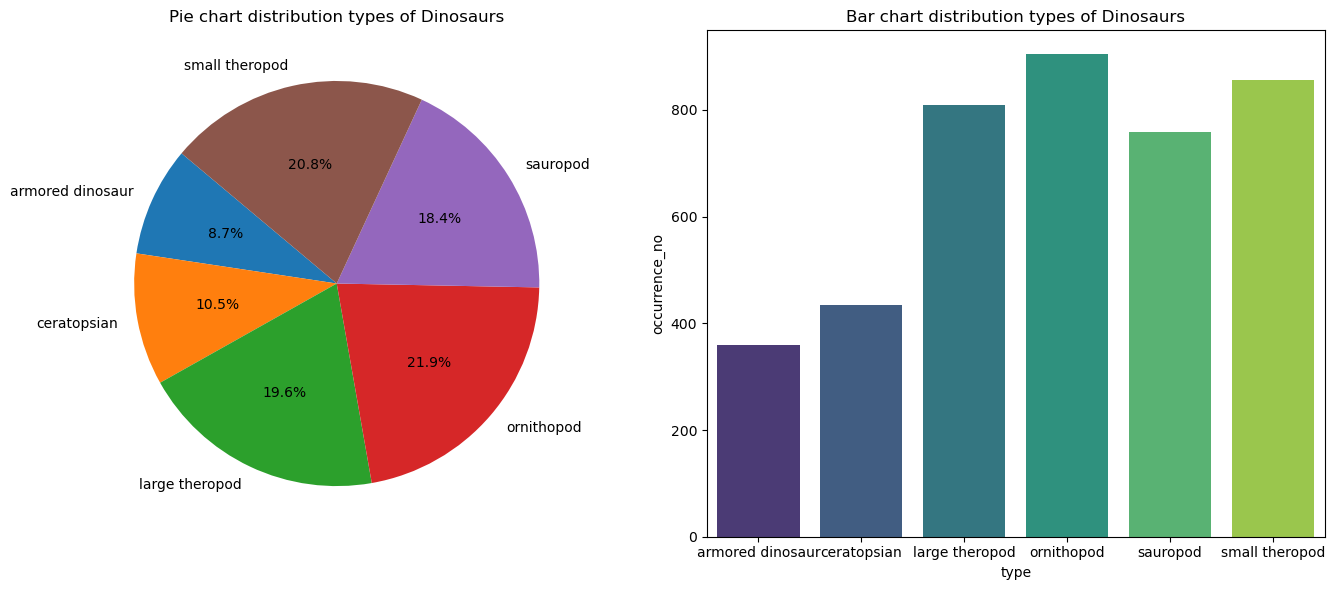

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(types['occurrence_no'], labels=types['type'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Pie chart distribution types of Dinosaurs')

sns.barplot(ax=axes[1], x=types['type'] ,y=types['occurrence_no'], data=types, palette='viridis')

# Adding title
plt.title('Bar chart distribution types of Dinosaurs')
plt.tight_layout()

# Show the plot
plt.show()

-Dinosaur type that appear more in the dataset is Ornithopod

#### Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this

In [24]:
time_lenght=new_dinosaurs.groupby(['max_ma','min_ma', 'type']).agg({'length_m':'mean'}).reset_index()
time_lenght

,max_ma,min_ma,type,length_m
0,70.6,66.0,armored dinosaur,5.662308
1,70.6,66.0,ceratopsian,8.037649
2,70.6,66.0,large theropod,7.560278
3,70.6,66.0,ornithopod,6.619732
4,70.6,66.0,sauropod,19.488726
...,...,...,...,...
317,237.0,201.3,sauropod,7.000000
318,237.0,201.3,small theropod,3.000000
319,237.0,208.5,small theropod,2.446771
320,237.0,228.0,large theropod,2.000000


In [25]:
time_lenght['time_avg'] = (time_lenght['max_ma'] + time_lenght['min_ma']) / 2

<Axes: xlabel='time_avg', ylabel='length_m'>

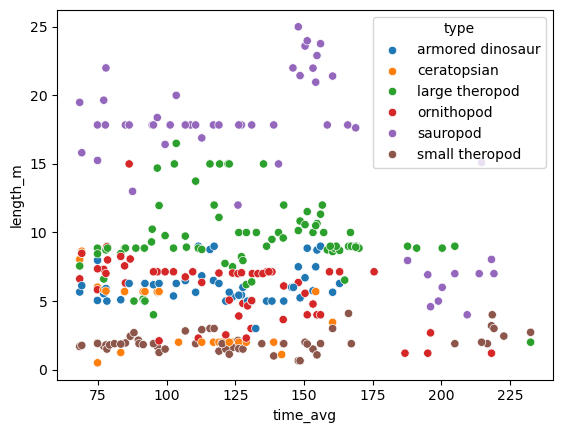

In [26]:
sns.scatterplot(data=time_lenght, x="time_avg", y="length_m", hue="type")

-Dinosaurs generally remained similar in height throughout most of their time period. Sauropods did exhibit a range of heights, in the period 150 to 175. Large theropods, on the other hand, did show a trend of increasing size over time, although the change may not have been particularly noticeable